In [1]:
# import zipfile
# ref_file = zipfile.ZipFile('/content/placement-project-logistic-regression-main.zip','r')
# ref_file.extractall('/content')
# ref_file.close()

In [39]:
import numpy as np

In [40]:
import pandas as pd

In [41]:
df = pd.read_csv('placement.csv')

In [42]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [44]:
df.shape

(100, 4)

In [45]:
df.iloc[:,1:]

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


## Steps Involved

1- Preprocess + EDA + Feature Selection \
2- Extract Input and Output columns\
3- Scale the value\
4- Train and Test split\
5- Train model \
6- Evaluate model / model selection\
7- Deploy the model

In [47]:
import matplotlib.pyplot as plt

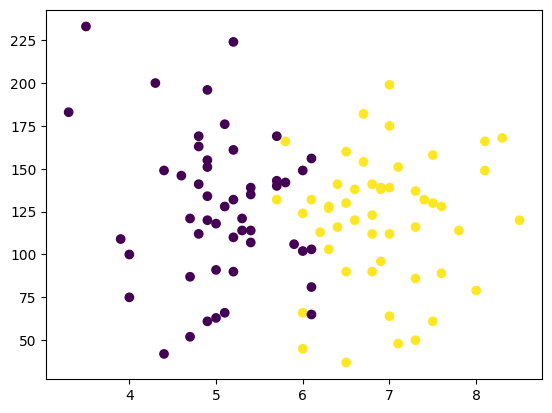

In [48]:
plt.scatter(df['cgpa'], df['iq'], c = df['placement'])

In [49]:
X = df.iloc[:,0:2]
Y = df.iloc[:,-1]

In [50]:
X.shape

(100, 2)

In [51]:
Y.shape

(100,)

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
x_train, x_test, Y_train, y_test = train_test_split(X,Y, test_size = 0.1)

In [54]:
Y_train

24    0
40    0
41    0
84    0
86    0
     ..
83    1
27    1
73    0
64    1
9     0
Name: placement, Length: 90, dtype: int64

In [55]:
x_train

,Unnamed: 0,cgpa
24,24,4.7
40,40,4.9
41,41,5.4
84,84,5.7
86,86,5.1
...,...,...
83,83,7.5
27,27,6.0
73,73,4.9
64,64,7.0


In [56]:
x_test

,Unnamed: 0,cgpa
98,98,6.3
2,2,5.3
60,60,6.9
70,70,6.3
28,28,5.2
97,97,6.7
37,37,8.1
48,48,6.6
3,3,7.4
1,1,5.9


In [57]:
Y_train

24    0
40    0
41    0
84    0
86    0
     ..
83    1
27    1
73    0
64    1
9     0
Name: placement, Length: 90, dtype: int64

In [58]:
y_test

98    1
2     0
60    1
70    1
28    0
97    1
37    1
48    1
3     1
1     0
Name: placement, dtype: int64

In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
scaler = StandardScaler()

In [61]:
X_train = scaler.fit_transform(x_train)

In [62]:
X_train

array([[-0.92959902, -1.07287922],
       [-0.35900116, -0.89952351],
       [-0.32333879, -0.46613424],
       [ 1.21014297, -0.20610068],
       [ 1.2814677 , -0.7261678 ],
       [-0.85827429,  0.92071143],
       [ 0.6395451 , -1.6796242 ],
       [-1.32188505,  0.4006443 ],
       [ 0.14027197,  0.4006443 ],
       [ 1.45977953,  1.3541007 ],
       [ 0.88918167, -0.98620137],
       [-0.96526138, -1.07287922],
       [ 0.24725907,  0.48732216],
       [-1.21489795, -0.63948995],
       [ 0.38990854,  1.18074499],
       [ 0.8535193 ,  0.66067787],
       [ 0.60388274, -0.81284566],
       [-1.53585925, -0.81284566],
       [-0.21635169,  1.3541007 ],
       [-1.03658612,  1.00738929],
       [ 1.53110427,  0.74735572],
       [-1.07224848,  0.57400001],
       [-1.25056032, -0.7261678 ],
       [-1.35754742, -0.46613424],
       [-1.42887215,  0.05393289],
       [ 1.13881823,  0.48732216],
       [ 0.67520747,  2.22087925],
       [ 1.10315587, -0.46613424],
       [ 0.46123327,

In [63]:
X_test = scaler.transform(x_test)

In [64]:
X_test

array([[ 1.7094161 ,  0.31396645],
       [-1.71417108, -0.55281209],
       [ 0.35424617,  0.83403358],
       [ 0.71086984,  0.31396645],
       [-0.78694955, -0.63948995],
       [ 1.67375373,  0.66067787],
       [-0.46598825,  1.87416783],
       [-0.07370222,  0.57400001],
       [-1.67850871,  1.26742285],
       [-1.74983345, -0.03274497]])

In [65]:
from sklearn.linear_model import LogisticRegression

In [66]:
clf = LogisticRegression()

In [67]:
clf.fit(X_train, Y_train)

LogisticRegression()

In [68]:
Y_pred = clf.predict(X_test)

In [69]:
Y_pred

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 0])

In [70]:
y_test

98    1
2     0
60    1
70    1
28    0
97    1
37    1
48    1
3     1
1     0
Name: placement, dtype: int64

In [71]:
from sklearn.metrics import accuracy_score 

In [72]:
accuracy_score(y_test, Y_pred)

1.0

In [73]:
# decision boundary

from mlxtend.plotting import plot_decision_regions


<Axes: >

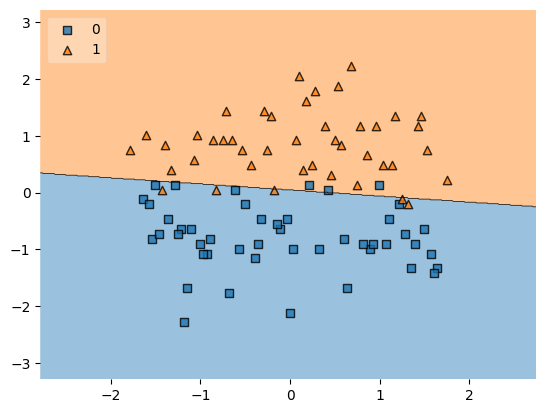

In [75]:
plot_decision_regions(X_train, Y_train.values, clf=clf, legend=2)